# CS486 - Artificial Intelligence
## Lesson 11 - Minimax

In adversarial search, our agent only gets to choose some portion of the path to the goal. How does that impact our search? We'll walk through a few examples of finding the best path to goal in the presence of an adversary.  

In [1]:
from helpers import nim_minimax_tree
from aima.games import *
from aima.notebook import psource

In [ ]:
class Nim(Game):
    def __init__(self,pile,n):
        self.moves = list(range(1,n+1))
        self.initial = GameState(to_move=1,utility=0,board=pile,moves=self.moves)
    
    def actions(self,state):
        return [x for x in self.moves if x <= state.board]
    
    def result(self,state,action):
        to_move=state.to_move%2+1
        board=state.board-action
        moves=[x for x in self.moves if x <= board]
        return GameState(to_move,None,board,moves)
    
    def utility(self,state,player):
        return (1 if state.to_move == player else -1)

In [ ]:
import random
nim = Nim(random.randint(5,10),3)
print(nim.initial)
nim.play_game(alphabeta_player,random_player)

d 1 i 1 n 0 child 1
d 1 i 1 n 1 child 2
d 1 i 1 n 2 child 3
d 2 i 4 n 0 child 4
d 2 i 4 n 1 child 5
d 2 i 4 n 2 child 6
d 2 i 4 n 3 child 7
d 2 i 4 n 4 child 8
d 2 i 4 n 5 child 9
d 2 i 4 n 6 child 10
d 2 i 4 n 7 child 11
d 2 i 4 n 8 child 12
d 3 i 13 n 0 child 13
d 3 i 13 n 1 child 14
d 3 i 13 n 2 child 15
d 3 i 13 n 3 child 16
d 3 i 13 n 4 child 17
d 3 i 13 n 5 child 18
d 3 i 13 n 6 child 19
d 3 i 13 n 7 child 20
d 3 i 13 n 8 child 21
d 3 i 13 n 9 child 22
d 3 i 13 n 10 child 23
d 3 i 13 n 11 child 24
d 3 i 13 n 12 child 25
d 3 i 13 n 13 child 26
d 3 i 13 n 14 child 27
d 3 i 13 n 15 child 28
d 3 i 13 n 16 child 29
d 3 i 13 n 17 child 30
d 3 i 13 n 18 child 31
d 3 i 13 n 19 child 32
d 3 i 13 n 20 child 33
d 3 i 13 n 21 child 34
d 3 i 13 n 22 child 35
d 3 i 13 n 23 child 36
d 3 i 13 n 24 child 37
d 3 i 13 n 25 child 38
d 3 i 13 n 26 child 39
d 4 i 40 n 0 child 40
d 4 i 40 n 1 child 41
d 4 i 40 n 2 child 42
d 4 i 40 n 3 child 43
d 4 i 40 n 4 child 44
d 4 i 40 n 5 child 45
d 4 i 40 n 6 c

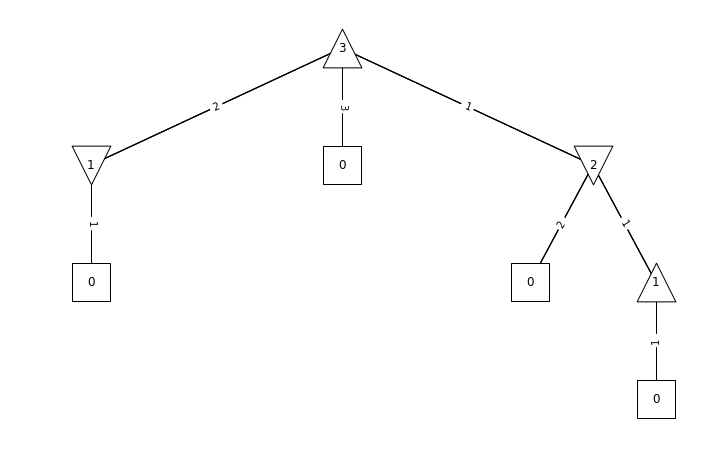

In [3]:
nim_minimax_tree(3,3)

In [ ]:
depth=6
b=2
i=0
for d in range(depth):
    print([(((i+n)+((i+n)%b))//b,i+n) for n in range(b**d)])
    i+=b**d

In [ ]:
i=1
b=2 # branching factor
depth=8 # depth
edges = []
edge_labels = {}
node_labels = {0:5}
node_shapes = {"s":[],"v":[],"^":[0]}

for d in range(1,depth):
    for n in range(b**d):
        child = i+n
        parent = (child-1)//b
        edge = (parent,child)
        edge_label = child%(b) + 1
        
        if parent in node_labels:
            node_label = node_labels[parent] - edge_label
            
            if node_label >= 0:
                edges.append(edge)
                edge_labels[edge] = edge_label
                node_labels[child] = node_label
                
                if node_label == 0:
                    node_shapes["s"].append(child) 
                elif d%2 == 0:
                    node_shapes["^"].append(child) 
                else:
                    node_shapes["v"].append(child) 

    i+=b**d

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

G=nx.Graph()
G.add_edges_from(edges)
pos = hierarchy_pos(G,0)    
nx.draw_networkx_edge_labels(G,pos,edge_labels)

for shape, nodelist in node_shapes.items():
    labels = {node: node_labels[node] for node in nodelist}
    nx.draw(G,pos,labels=labels,nodelist=nodelist,node_shape=shape,node_color='w',edgecolors='black',node_size=1500)